<a href="https://colab.research.google.com/github/evs-11/Alura-Store/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Alura Store

*Se ayudará al Sr. Juan a decidir qué tienda de su cadena Alura Store debe vender para iniciar un nuevo emprendimiento. Para ello se analizará datos de ventas, rendimiento, costo de envío, etc. de las 4 tiendas de Alura Store. El objetivo es identificar la tienda menos eficiente y presentar una recomendación final basada en los datos.*

### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [ ]:
from urllib.request import urlopen
import csv

urls = [url, url2, url3, url4]


In [ ]:
# Función para leer un CSv desde URL
def leer_csv(url):
  datos = []
  with urlopen(url) as respuesta:
    lineas = respuesta.read().decode('utf-8').splitlines()
    lector = csv.DictReader(lineas)
    for fila in lector:
      datos.append(fila)
    return datos

#1. Análisis de facturación



In [ ]:
# Análisis de facturación
total_facturacion = 0

for i, url in enumerate(urls):
  datos_tienda = leer_csv(url)
  facturacion_tienda = 0

  for venta in datos_tienda:
    precio = float(venta['Precio'])   #Sumamos el precio solamente
    facturacion_tienda += precio

  print(f"Facturación Tienda {i+1}: ${facturacion_tienda:.2f}")
  total_facturacion += facturacion_tienda


  # Mostar la facturación total con 2 decimales y separadas en cada renglón
  print(f"\nFacturación total de todas las tiendas: ${total_facturacion:.2f}")


Facturación Tienda 1: $1150880400.00

Facturación total de todas las tiendas: $1150880400.00
Facturación Tienda 2: $1116343500.00

Facturación total de todas las tiendas: $2267223900.00
Facturación Tienda 3: $1098019600.00

Facturación total de todas las tiendas: $3365243500.00
Facturación Tienda 4: $1038375700.00

Facturación total de todas las tiendas: $4403619200.00


In [ ]:
# Sumando solo el precio de las ventas (sin considerar las cuotas)
facturacion_tienda1 = tienda['Precio'].astype(float).sum()
facturacion_tienda2 = tienda2['Precio'].astype(float).sum()
facturacion_tienda3 = tienda3['Precio'].astype(float).sum()
facturacion_tienda4 = tienda4['Precio'].astype(float).sum()

#Mostrar los resultados
print(f"Facturación Tienda 1: ${facturacion_tienda1:.2f}")
print(f"Facturación Tienda 2: ${facturacion_tienda2:.2f}")
print(f"Facturación Tienda 3: ${facturacion_tienda3:.2f}")
print(f"Facturación Tienda 4: ${facturacion_tienda4:.2f}")

# Facturación total de las 4 tiendas
facturacion_total = facturacion_tienda1 + facturacion_tienda2 + facturacion_tienda3 + facturacion_tienda4
print(f"\nFacturación total de las 4 tiendas: ${facturacion_total:.2f}")

Facturación Tienda 1: $1150880400.00
Facturación Tienda 2: $1116343500.00
Facturación Tienda 3: $1098019600.00
Facturación Tienda 4: $1038375700.00

Facturación total de las 4 tiendas: $4403619200.00


# 2. Ventas por categoría

In [ ]:
def leer_csv(url):
    datos =[]
    with urlopen(url) as respuesta:
         # decodificar los datos
         lineas = respuesta.read().decode('utf-8').splitlines()
         reader = csv.DictReader(lineas)
         for fila in reader:
            datos.append(fila)
    return datos


# Diccionario para almacenar las ventas por categoría
ventas_por_categoria = {}

# Procesar todas las tiendas
for i, url in enumerate(urls):
    datos_tienda = leer_csv(url)
    print(f"\nVentas por categoría en Tienda {i+1}:")

# diccionario para la tienda actual
    categorias_tienda = {}

    for venta in datos_tienda:
        categoria = venta['Categoría del Producto']
        precio = float(venta['Precio'])
        cantidad = int(venta['Cantidad de cuotas'])
        monto_venta = precio * cantidad

        # Se agrega al diccionario de la tienda actual
        if categoria in categorias_tienda:
            categorias_tienda[categoria] += monto_venta
        else:
          categorias_tienda[categoria] = monto_venta

        # Se agrega al diccionario general
        if categoria in ventas_por_categoria:
            ventas_por_categoria[categoria] += monto_venta
        else:
            ventas_por_categoria[categoria] = monto_venta

    # Mostrar resultados para esta tienda
    for categoria, monto in categorias_tienda.items():
        print(f" {categoria}: ${monto:.2f}")

# Mostrar resultados totales
print("\nVentas totales por categoría (todas las tiendas):")
for categoria, monto in ventas_por_categoria.items():
    print(f" {categoria}: ${monto:.2f}")

# Calcular el total general
total_general = sum(ventas_por_categoria.values())
print(f"\nTotal general de ventas: ${total_general:.2f}")


Ventas por categoría en Tienda 1:
 Electrónicos: $1290390700.00
 Muebles: $582928200.00
 Juguetes: $49062800.00
 Electrodomésticos: $1032375600.00
 Artículos para el hogar: $38316800.00
 Deportes y diversión: $126883700.00
 Libros: $25769400.00
 Instrumentos musicales: $276990500.00

Ventas por categoría en Tienda 2:
 Muebles: $527332100.00
 Instrumentos musicales: $294448700.00
 Deportes y diversión: $81660600.00
 Electrónicos: $1286643600.00
 Artículos para el hogar: $42739700.00
 Juguetes: $46721200.00
 Electrodomésticos: $1026226300.00
 Libros: $31417000.00

Ventas por categoría en Tienda 3:
 Electrodomésticos: $1081380800.00
 Muebles: $555092500.00
 Instrumentos musicales: $250336000.00
 Deportes y diversión: $123399200.00
 Electrónicos: $1101334500.00
 Juguetes: $61190400.00
 Artículos para el hogar: $44724600.00
 Libros: $26358900.00

Ventas por categoría en Tienda 4:
 Electrodomésticos: $879089600.00
 Muebles: $556628000.00
 Deportes y diversión: $100062000.00
 Libros: $295434

In [ ]:
# función para calcular y mostrar las ventas por categoría de una teinda
def ventas_por_categoria (tienda, numero):
    ventas = tienda.groupby('Categoría del Producto')['Precio'].sum()
    print(f"\nVentas por categoría en Tienda {numero}:")
    print(ventas)

# Mostrar resultados para cada tienda
ventas_por_categoria(tienda, 1)
ventas_por_categoria(tienda2, 2)
ventas_por_categoria(tienda3, 3)
ventas_por_categoria(tienda4, 4)


Ventas por categoría en Tienda 1:
Categoría del Producto
Artículos para el hogar     12698400.0
Deportes y diversión        39290000.0
Electrodomésticos          363685200.0
Electrónicos               429493500.0
Instrumentos musicales      91299000.0
Juguetes                    17995700.0
Libros                       8784900.0
Muebles                    187633700.0
Name: Precio, dtype: float64

Ventas por categoría en Tienda 2:
Categoría del Producto
Artículos para el hogar     14746900.0
Deportes y diversión        34744500.0
Electrodomésticos          348567800.0
Electrónicos               410831100.0
Instrumentos musicales     104990300.0
Juguetes                    15945400.0
Libros                      10091200.0
Muebles                    176426300.0
Name: Precio, dtype: float64

Ventas por categoría en Tienda 3:
Categoría del Producto
Artículos para el hogar     15060000.0
Deportes y diversión        35593100.0
Electrodomésticos          329237900.0
Electrónicos               

# 3. Calificación promedio de la tienda


In [ ]:
def leer_csv(url):
     datos = []
     with urlopen(url)as respuesta:
    # decodificar los datos
         lineas = respuesta.read().decode('utf-8').splitlines()
         reader = csv.DictReader(lineas)
         for fila in reader:
             datos.append(fila)
     return datos


  # Calcular la calificación promedio para cada tienda
for i, url in enumerate(urls):
    datos_tienda = leer_csv(url)

      # Variables para calcular el promedio
    suma_calificaciones = 0
    cantidad_productos = 0

    for producto in datos_tienda:
        try:
            # intentamos con diferentes nombres de columnas diferentes
            if 'Calificación' in producto:
                calificacion = float(producto['Calificación'])
            elif 'Calificacion' in producto:
                calificacion = float(producto['Calificacion'])
            elif 'calificación' in producto:
                calificacion = float(producto['calificación'])
            elif 'calificacion' in producto:
                calificacion = float(producto['calificacion'])
            else:
                 # si no encontramos la columna imprimir las claves disponibles
                 print(f"Claves disponibles en la tienda {i+1}", producto.keys())
                 raise KeyError("No se encontró la columna de calificación")

            suma_calificaciones += calificacion
            cantidad_productos += 1

        except (ValueError, KeyError) as e:
            if isinstance(e, KeyError):
                raise
            #ignoramos valores que no se pueden convertir a float
            continue

    if cantidad_productos > 0:
        calificacion_promedio = suma_calificaciones / cantidad_productos
        print(f"Calificación promedio de la Tienda {i+1}: {calificacion_promedio:.2f}")
    else:
        print(f"No se pudieron procesar calificaciones para la Tienda {i+1}")



Calificación promedio de la Tienda 1: 3.98
Calificación promedio de la Tienda 2: 4.04
Calificación promedio de la Tienda 3: 4.05
Calificación promedio de la Tienda 4: 4.00


In [ ]:
def clasificacion_promedio(tienda, numero):
    promedio = tienda['Calificación'].mean()
    print(f"Clasificación promedio en tienda {numero}: {promedio:.2f}")

#Mostrar resultados para cada tienda
clasificacion_promedio(tienda, 1)
clasificacion_promedio(tienda2, 2)
clasificacion_promedio(tienda3, 3)
clasificacion_promedio(tienda4, 4)

Clasificación promedio en tienda 1: 3.98
Clasificación promedio en tienda 2: 4.04
Clasificación promedio en tienda 3: 4.05
Clasificación promedio en tienda 4: 4.00


# 4. Productos más y menos vendidos

In [ ]:
from collections import defaultdict
def leer_csv(url):
    datos = []
    with urlopen(url) as respuesta:
        lineas = respuesta.read().decode('utf-8').splitlines()
        lector = csv.DictReader(lineas)
        for fila in lector:
            datos.append(fila)
    return datos

# Función para calcular Top 3 más y menos dinero generado
def top_productos(datos_tienda, tienda_numero):
    ingreso_por_producto = defaultdict(float)

    for venta in datos_tienda:
        producto = venta['Producto']
        precio = float(venta['Precio'])
        # Ahora solo usamos el precio (no multiplicamos por cantidad de cuotas)
        ingreso_por_producto[producto] += precio

    # Convertimos a lista ordenada
    productos_ordenados = sorted(ingreso_por_producto.items(), key=lambda x: x[1], reverse=True)

    top_mas_vendidos = productos_ordenados[:3]
    top_menos_vendidos = productos_ordenados[-3:]

    print(f"\nTienda {tienda_numero} - TOP 3 productos que MÁS dinero generaron:")
    for producto, ingreso in top_mas_vendidos:
        print(f"  {producto} - Ingresos: ${ingreso:.2f}")

    print(f"\nTienda {tienda_numero} - TOP 3 productos que MENOS dinero generaron:")
    for producto, ingreso in top_menos_vendidos:
        print(f"  {producto} - Ingresos: ${ingreso:.2f}")

# Recorrer todas las tiendas
for i, url in enumerate(urls, start=1):
    datos_tienda = leer_csv(url)
    top_productos(datos_tienda, i)


Tienda 1 - TOP 3 productos que MÁS dinero generaron:
  TV LED UHD 4K - Ingresos: $142150200.00
  Refrigerador - Ingresos: $112143300.00
  Iphone 15 - Ingresos: $97902200.00

Tienda 1 - TOP 3 productos que MENOS dinero generaron:
  Cubo mágico 8x8 - Ingresos: $696900.00
  Dinosaurio Rex - Ingresos: $688900.00
  Cuerda para saltar - Ingresos: $652800.00

Tienda 2 - TOP 3 productos que MÁS dinero generaron:
  Iphone 15 - Ingresos: $113225800.00
  TV LED UHD 4K - Ingresos: $103375000.00
  Refrigerador - Ingresos: $97632500.00

Tienda 2 - TOP 3 productos que MENOS dinero generaron:
  Cuerda para saltar - Ingresos: $856900.00
  Dinosaurio Rex - Ingresos: $770300.00
  Cubo mágico 8x8 - Ingresos: $643600.00

Tienda 3 - TOP 3 productos que MÁS dinero generaron:
  Refrigerador - Ingresos: $99889700.00
  TV LED UHD 4K - Ingresos: $96669100.00
  Iphone 15 - Ingresos: $93225700.00

Tienda 3 - TOP 3 productos que MENOS dinero generaron:
  Cuerda para saltar - Ingresos: $853800.00
  Dinosaurio Rex -

In [ ]:
# Leer todos los CSVs y agregar una columna 'Tienda'
df_total = pd.concat(
    [pd.read_csv(url).assign(Tienda=f"Tienda {i+1}") for i, url in enumerate(urls)],
    ignore_index=True
)

# Aseguramos los tipos correctos
df_total['Precio'] = df_total['Precio'].astype(float)
df_total['Cantidad de cuotas'] = df_total['Cantidad de cuotas'].astype(int)

# El ingreso es simplemente el Precio (no multiplicamos por cantidad de cuotas)
df_total['Ingreso'] = df_total['Precio']

# Agrupamos por Tienda y Producto sumando el ingreso
ventas = df_total.groupby(['Tienda', 'Producto'])['Ingreso'].sum().reset_index()

# Función para mostrar los 3 productos que más y menos dinero generaron
def top_productos(tienda):
    data = ventas[ventas['Tienda'] == tienda]

    top_mas_vendidos = data.sort_values(by='Ingreso', ascending=False).head(3)
    top_menos_vendidos = data.sort_values(by='Ingreso', ascending=True).head(3)

    print(f"\n{tienda} - TOP 3 productos que MÁS dinero generaron:")
    for _, fila in top_mas_vendidos.iterrows():
        print(f"  {fila['Producto']} - Ingresos: ${fila['Ingreso']:.2f}")

    print(f"\n{tienda} - TOP 3 productos que MENOS dinero generaron:")
    for _, fila in top_menos_vendidos.iterrows():
        print(f"  {fila['Producto']} - Ingresos: ${fila['Ingreso']:.2f}")

# Lista única de tiendas
tiendas_unicas = ventas['Tienda'].unique()

# Mostrar resultados para cada tienda
for tienda in tiendas_unicas:
    top_productos(tienda)


Tienda 1 - TOP 3 productos que MÁS dinero generaron:
  TV LED UHD 4K - Ingresos: $142150200.00
  Refrigerador - Ingresos: $112143300.00
  Iphone 15 - Ingresos: $97902200.00

Tienda 1 - TOP 3 productos que MENOS dinero generaron:
  Cuerda para saltar - Ingresos: $652800.00
  Dinosaurio Rex - Ingresos: $688900.00
  Cubo mágico 8x8 - Ingresos: $696900.00

Tienda 2 - TOP 3 productos que MÁS dinero generaron:
  Iphone 15 - Ingresos: $113225800.00
  TV LED UHD 4K - Ingresos: $103375000.00
  Refrigerador - Ingresos: $97632500.00

Tienda 2 - TOP 3 productos que MENOS dinero generaron:
  Cubo mágico 8x8 - Ingresos: $643600.00
  Dinosaurio Rex - Ingresos: $770300.00
  Cuerda para saltar - Ingresos: $856900.00

Tienda 3 - TOP 3 productos que MÁS dinero generaron:
  Refrigerador - Ingresos: $99889700.00
  TV LED UHD 4K - Ingresos: $96669100.00
  Iphone 15 - Ingresos: $93225700.00

Tienda 3 - TOP 3 productos que MENOS dinero generaron:
  Cubo mágico 8x8 - Ingresos: $640400.00
  Dinosaurio Rex - In

# 5. Envío promedio por tienda

In [ ]:
def calcular_envio_promedio(datos_tienda, tienda_numero):
    costos_envio = []

    for venta in datos_tienda:
        costo_envio = float(venta['Costo de envío'])
        costos_envio.append(costo_envio)

    promedio_envio = sum(costos_envio) / len(costos_envio) if costos_envio else 0

    print(f"Tienda {tienda_numero} - Envío promedio: ${promedio_envio:.2f}")

# Procesar todas las tiendas
for i, url in enumerate(urls, start=1):
    datos_tienda = leer_csv(url)
    calcular_envio_promedio(datos_tienda, i)

Tienda 1 - Envío promedio: $26018.61
Tienda 2 - Envío promedio: $25216.24
Tienda 3 - Envío promedio: $24805.68
Tienda 4 - Envío promedio: $23459.46


In [ ]:
# Asegurar que el costo de envío es numérico
df_total['Costo de envío'] = df_total['Costo de envío'].astype(float)

# Agrupar por tienda y calcular el promedio del costo de envío
envio_promedio = df_total.groupby('Tienda')['Costo de envío'].mean()

# Mostrar resultados
print("\nEnvío promedio por tienda:")
for tienda, promedio in envio_promedio.items():
    print(f"{tienda}: ${promedio:.2f}")


Envío promedio por tienda:
Tienda 1: $26018.61
Tienda 2: $25216.24
Tienda 3: $24805.68
Tienda 4: $23459.46


# Gráficos

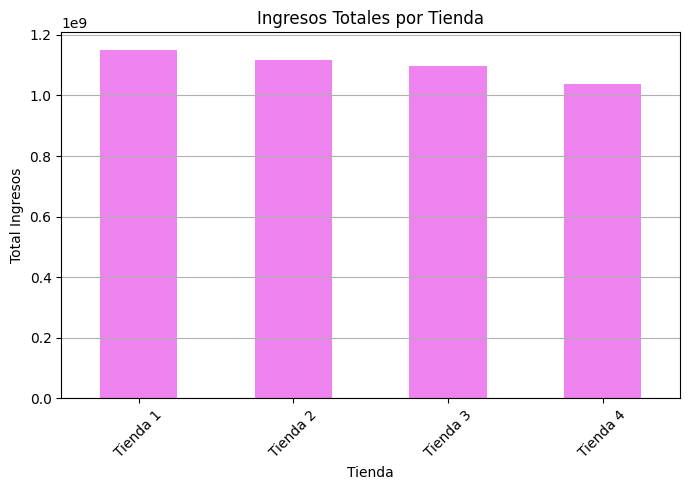

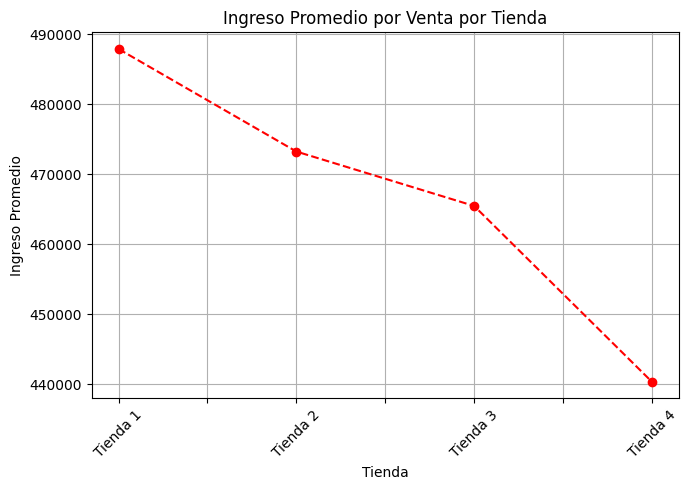

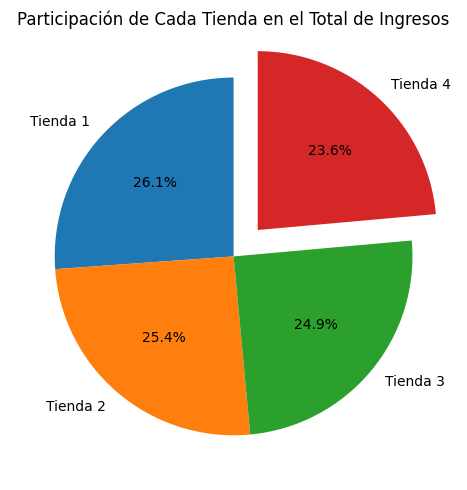

In [ ]:
import matplotlib.pyplot as plt

# Asegurar tipo correcto
df_total['Precio'] = df_total['Precio'].astype(float)

# El ingreso de cada venta es simplemente el precio
df_total['Ingreso'] = df_total['Precio']

# Agrupar datos
ingresos_totales = df_total.groupby('Tienda')['Ingreso'].sum()
ingreso_promedio = df_total.groupby('Tienda')['Ingreso'].mean()
distribucion_ingresos = ingresos_totales

# Graficar 3 gráficos diferentes

# 1- Barra vertical: Total de ingresos
plt.figure(figsize=(7,5))
ingresos_totales.plot(kind='bar', color='violet')

plt.title('Ingresos Totales por Tienda')
plt.ylabel('Total Ingresos')
plt.xlabel('Tienda')
plt.grid(axis='y')
plt.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()


# 2- Línea: Promedio de ingreso por venta
plt.figure(figsize=(7,5))
ingreso_promedio.plot(kind='line', marker='o', linestyle='--', color='red')
plt.title('Ingreso Promedio por Venta por Tienda')
plt.ylabel('Ingreso Promedio')
plt.xlabel('Tienda')
plt.grid(True)
plt.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()


# 3- Torta: Distribución del total
plt.figure(figsize=(7,5))
explode = (0,0,0,0.2)
distribucion_ingresos.plot(kind='pie', autopct='%1.1f%%', startangle=90, explode=explode)
plt.title('Participación de Cada Tienda en el Total de Ingresos')
plt.ylabel('')
plt.tight_layout()
plt.show()

##Recomendación

Según los datos evaluados de las tiendas del Sr. Juan, analizando la facturación, realizando la clasificación de las tiendas según sus ventas por productos (los más y los menos vendidos), además de sus gastos promedios; todo ello en cada una de las cuatro tiendas, se recomienda:

-Que verificando el total de ingresos que genera cada una de ellas, la TIENDA 4 es la menos eficiente por lo que debería ser la elegida para vender.